# EDA ON BANK LOAN DATA

### Problem Statement :-
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
**[More Details](https://learn.upgrad.com/course/3545/segment/26965/167316/512620/2634324)**

### Objective :-
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Datasets :-
1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
 
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

### Author :-
- name : Rahul Patil
- emailid : Rahulptl1997@gmail.com

## Step 1.Importing all Libraries

> Donot Proceed if the library import fails

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
quantile_range=[0.1,.25,.5,.75,.90,.95,.99,.999,1]
pd.set_option('display.float_format', lambda x: '%,.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings("ignore")

## CURRENT APPLICATION DATA

In [2]:
application_data = pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0

### Shape of the Application Data

In [3]:
print("Rows : ",application_data.shape[0])
print("Columns : ",application_data.shape[1])

Rows :  307511
Columns :  122


### NULL Value Analysis

In [4]:
perc_null_in_columns = (application_data.isna().sum()*100/application_data.shape[0]).sort_values(ascending=False).reset_index()
perc_null_in_columns.columns=['ColumnName','PercentageNull']
perc_null_in_columns

,ColumnName,PercentageNull
0,COMMONAREA_MEDI,69.87
1,COMMONAREA_AVG,69.87
2,COMMONAREA_MODE,69.87
3,NONLIVINGAPARTMENTS_MODE,69.43
4,NONLIVINGAPARTMENTS_AVG,69.43
5,NONLIVINGAPARTMENTS_MEDI,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_MODE,68.35
8,LIVINGAPARTMENTS_AVG,68.35
9,LIVINGAPARTMENTS_MEDI,68.35


### Columns having more than 40% Null Values

In [5]:
perc_null_in_columns[perc_null_in_columns.PercentageNull>40]

,ColumnName,PercentageNull
0,COMMONAREA_MEDI,69.87
1,COMMONAREA_AVG,69.87
2,COMMONAREA_MODE,69.87
3,NONLIVINGAPARTMENTS_MODE,69.43
4,NONLIVINGAPARTMENTS_AVG,69.43
5,NONLIVINGAPARTMENTS_MEDI,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_MODE,68.35
8,LIVINGAPARTMENTS_AVG,68.35
9,LIVINGAPARTMENTS_MEDI,68.35


### Dropping Columns having more than 40% Null Values

In [6]:
columns = perc_null_in_columns[perc_null_in_columns.PercentageNull>40].ColumnName
application_data = application_data.drop(columns=columns)
print(f"Dropped {len(columns)} columns")
print(application_data.shape)

Dropped 49 columns
(307511, 73)


In [7]:
application_data.isna().sum()*100/application_data.shape[0]

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

### Dropping Document related Columns

In [8]:
columns = [i for i in application_data.columns if 'DOCUMENT' in i.upper()]
application_data.drop(columns=columns, inplace=True)
print(f"Dropped {len(columns)} columns")
print(f"New Shape {application_data.shape}")

Dropped 20 columns
New Shape (307511, 53)


### Dropping Flag Related Columns

In [9]:
columns = [i for i in application_data.columns if 'FLAG' in i.upper()]
application_data.drop(columns=columns, inplace=True)
print(f"Dropped {len(columns)} columns")
print(f"New Shape {application_data.shape}")

Dropped 8 columns
New Shape (307511, 45)


In [10]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,"-1,134.00",0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,NaN,1.00,0.00,1.00,0.00,-828.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,-815.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,"-9,833.00",-2437,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,NaN,2.00,0.00,2.00,0.00,-617.00,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,"121,500.00","513,000.00","21,865.50","513,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,"-4,311.00",-3458,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,NaN,0.00,0.00,0.00,0.00,"-1,106.00",0.00,0.00,0.00,0.00,0.00,0.00


## Univariate Analysis

### 1. Categorical Analysis

1. [Describing Categorical Data](#Describing_Categorical_Data)
2. [Generic Univariate Categorical Visualisation Function](#Generic_Univariate_Categorical_Visualisation_Function)

Analysing Columns
1. [NAME_CONTRACT_TYPE](#NAME_CONTRACT_TYPE)
2. [CODE_GENDER](#CODE_GENDER)
3. [NAME_TYPE_SUITE](#NAME_TYPE_SUITE)
4. [NAME_INCOME_TYPE](#NAME_INCOME_TYPE)
5. [NAME_EDUCATION_TYPE](#NAME_EDUCATION_TYPE)
6. [NAME_FAMILY_STATUS](#NAME_FAMILY_STATUS)
7. [NAME_HOUSING_TYPE](#NAME_HOUSING_TYPE)
8. [OCCUPATION_TYPE](#OCCUPATION_TYPE)
9. [ORGANIZATION_TYPE](#ORGANIZATION_TYPE)

<a id='Describing_Categorical_Data'> </a>
#### Describing Categorical Data with its summary

In [11]:
cat_columns  = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']
application_data[cat_columns].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
count,307511,307511,306219,307511,307511,307511,307511,211120,307511
unique,2,3,7,8,5,6,6,18,58
top,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3
freq,278232,202448,248526,158774,218391,196432,272868,55186,67992


<a id='Generic_Univariate_Categorical_Visualisation_Function'> </a>
#### Visualization Function to Analyse Categorical Data against itself and response column

In [12]:

def univariate_categorical_analyser(column_name,orient='vertical',application_data=application_data, target='TARGET'):

    normalized_value_counts = (application_data[column_name].value_counts(normalize=True)*100).sort_values(ascending=False)
    order_of_columns = normalized_value_counts.index
    if orient=='vertical':
        fig,ax = plt.subplots(1,2,figsize=(20, 8))
        fig.tight_layout()
        sns.barplot(x=normalized_value_counts.index, y=normalized_value_counts,orient=orient, order = order_of_columns, ax=ax[0])
        ax[0].title.set_text(f'Distribution of Count by {column_name}')
        ax[0].set_ylabel('% of Applicants')
        ax[0].set_yticks(ticks=np.arange(0,max(normalized_value_counts),10))

        ax[0].bar_label(ax[0].containers[-1], fmt='%.0f%%', label_type='center')
        ax[0].tick_params(axis='x', labelrotation = 45)
            
        ditribution_by_target = (application_data.groupby(column_name)[target].mean()*100)
        sns.barplot(y=ditribution_by_target,x=ditribution_by_target.index,orient=orient,order=order_of_columns,ax=ax[1])
        ax[1].axhline(y=application_data[target].mean()*100,color='red',label='Mean Late Payment Rate')
        ax[1].title.set_text(f'Distribution of {column_name} by {target}')
        ax[1].set_ylabel(f'% of Applicants')
        plt.legend()
        ax[1].bar_label(ax[1].containers[-1], fmt='%.0f%%', label_type='center')
        
        ax[1].tick_params(axis='x', labelrotation = 45)
    else:
        fig,ax = plt.subplots(1,2,figsize=(15, 5))
        #fig.tight_layout()
        sns.barplot(y=normalized_value_counts.index, x=normalized_value_counts,orient=orient, order = order_of_columns, ax=ax[0])
        ax[0].title.set_text(f'Distribution of Count by {column_name}')
        ax[0].set_xlabel('% of Applicants')
        ax[0].set_xticks(ticks=np.arange(0,max(normalized_value_counts),10))

        ax[0].bar_label(ax[0].containers[-1], fmt='%.0f%%', label_type='center')
        ax[1].tick_params(axis='y', labelrotation = 45)
        ditribution_by_target = (application_data.groupby(column_name)[target].mean()*100)
        sns.barplot(x=ditribution_by_target,y=ditribution_by_target.index,orient=orient,order=order_of_columns,ax=ax[1])
        ax[1].axvline(x=application_data[target].mean()*100,color='red',label='Mean Late Payment Rate')
        ax[1].title.set_text(f'Distribution of {column_name} by {target}')
        ax[1].set_xlabel(f'% of Applicants')
        plt.legend()
        ax[1].bar_label(ax[1].containers[-1], fmt='%.0f%%', label_type='center')
        ax[1].tick_params(axis='y', labelrotation = 45)
        plt.show()
    print()

<a id='NAME_CONTRACT_TYPE'></a>
#### Categorical Column 1 : NAME_CONTRACT_TYPE

> **Meaning of Column**.
> * NAME_CONTRACT_TYPE - Identification if loan is cash or revolving

> **Inference**.
> *  ~ 90% of Applicants are Cash Loans.
> *  Cash Loans perform a lot worse than Revolving loans applications when missed payment date is considered.
> *  Cash Loans are slightly worse than the average Response Rate

> **Conclusion**.
> * Revolving Loans are much better than Cash Loans when considering applications


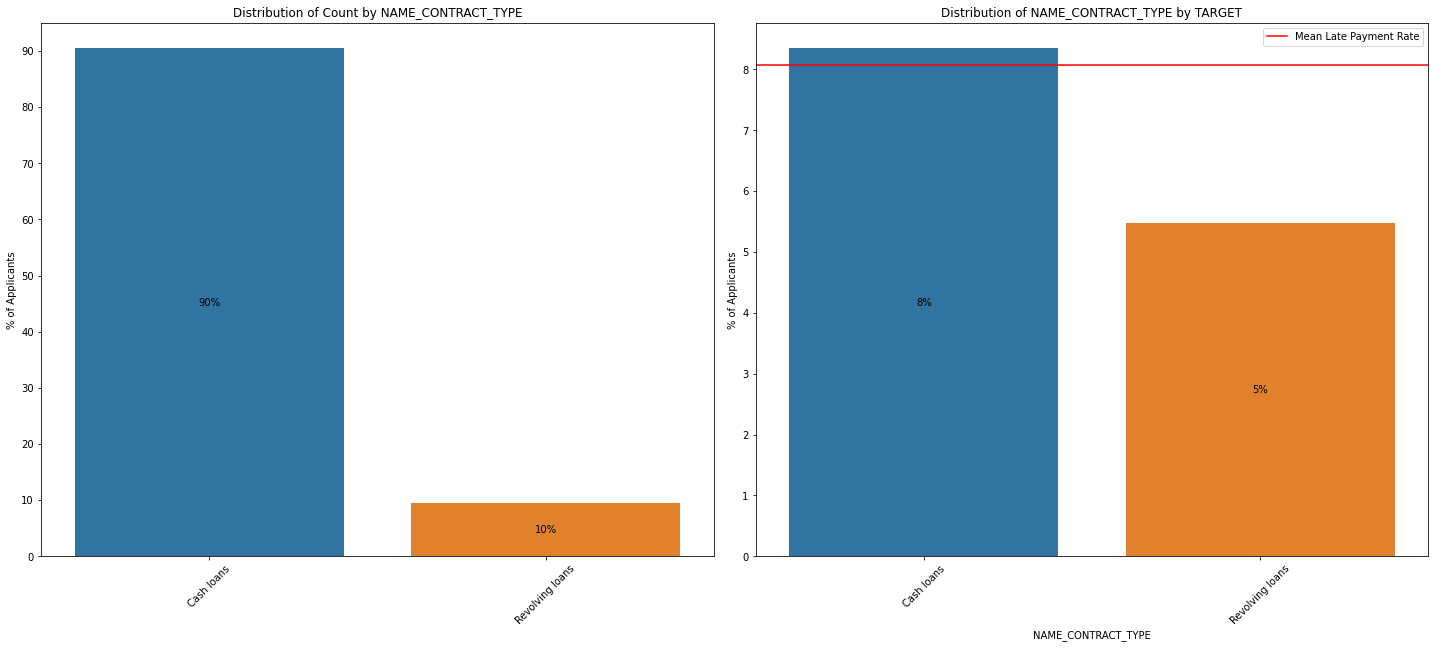

In [13]:
univariate_categorical_analyser('NAME_CONTRACT_TYPE')

<a id='CODE_GENDER'></a>


#### Categorical Column 2 : CODE_GENDER

> **Meaning of Column**.
> * CODE_GENDER - Gender of Applicant

> **Inference**.
> *  There are significantly more female applications than Male applications
> *  Male applications not only perform a lot worse on defaulting than Female applications but also on the mean defaulting rate.

> **Conclusion**.
> * Female Applications are much better than male applications when considering applications

##### Initial Analysis

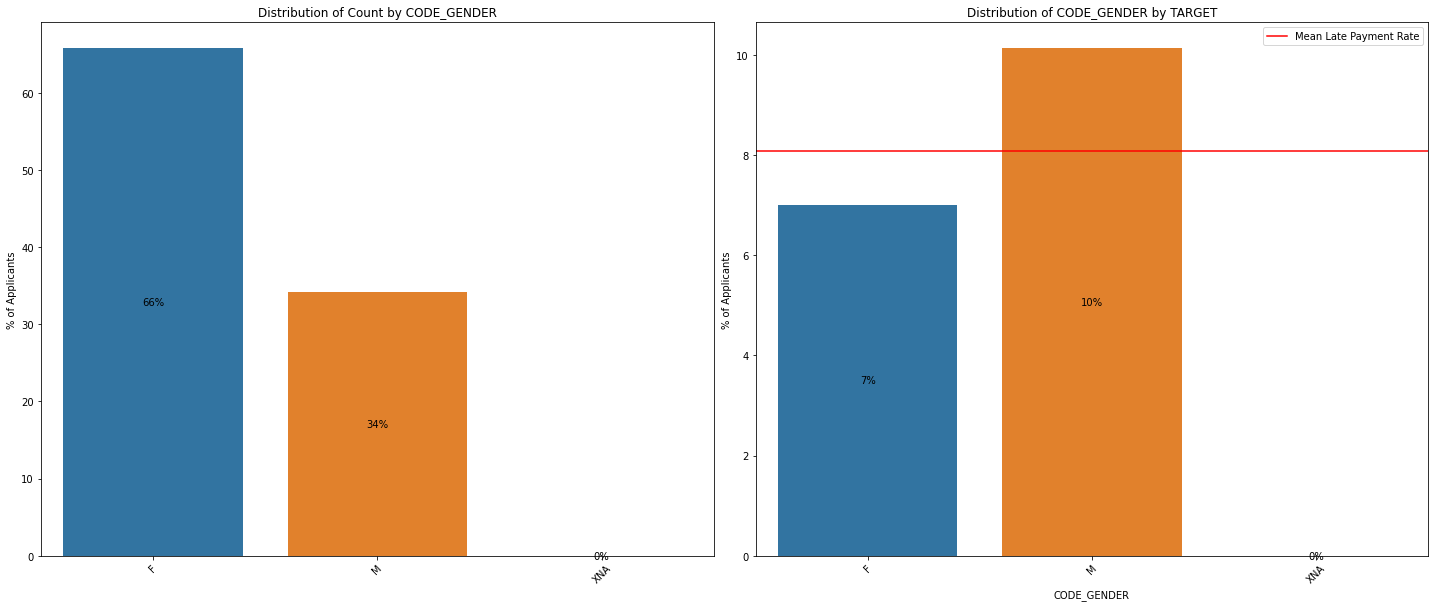

In [14]:
univariate_categorical_analyser('CODE_GENDER')

##### Marking XNA Gender as NA to remove them from analysis

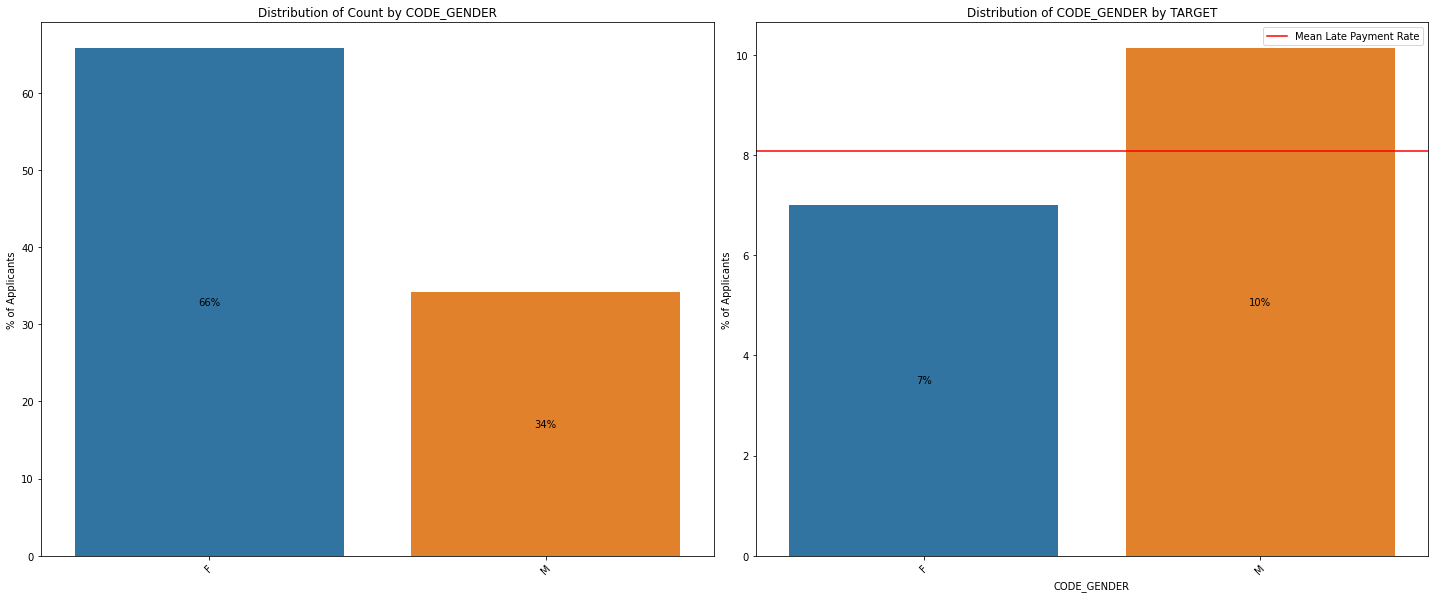

In [15]:
application_data['CODE_GENDER'] = np.where(application_data.CODE_GENDER=='XNA',np.nan,application_data.CODE_GENDER)
univariate_categorical_analyser('CODE_GENDER')

<a id='NAME_TYPE_SUITE'></a>
#### Categorical Column 3 : NAME_TYPE_SUITE

> **Meaning of Column**.
> * NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan

> **Inference**.
> *  Most of the applications are unaccompanied
> *  Applicants who are accompanied by family, perform slightly better against when they are uncacompanied
> *  All other groups have very less Data Points to comment

> **Conclusion**.
> *  An applicant who is accompanied by Family has a better chance of repaying loan on time than of an applicant who is unaccompanied

##### Initial Analysis

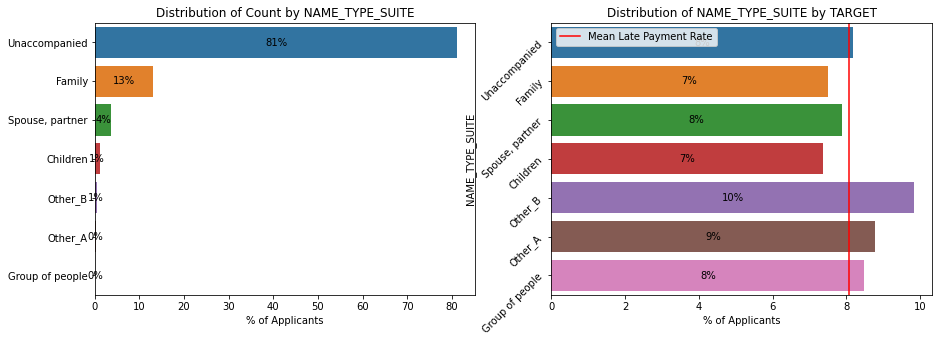

In [16]:
univariate_categorical_analyser('NAME_TYPE_SUITE',orient='horizontal')

<a id='INCOME_TYPE_SUITE'></a>
#### Categorical Column 3 : INCOME_TYPE_SUITE

> **Meaning of Column**.
> * INCOME_TYPE_SUITE - Clients income type (businessman, working, maternity leave,…)

> **Inference**.
> * 1 out 2 applicants are of type working class, however they still do have have a defaulting rate which is very high compared to the average defaulting rate
> * Even though the applicants who are on maternity leave or unemployed are very few, the probability of them defaulting is very high.

> **Conclusion**.
> * People who are **Pensioners, State Servants, Commercial Associates** are good applicants to consider, as against working class.
> * Unemployed and People are people on maternity leave are big red flags when considering to offer loans


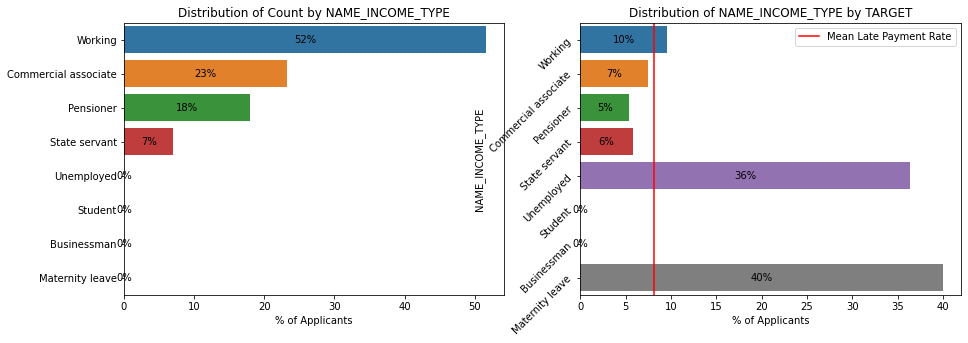

In [17]:
univariate_categorical_analyser('NAME_INCOME_TYPE',orient='horizontal')

<a id='NAME_EDUCATION_TYPE'></a>
#### Categorical Column 4 : NAME_EDUCATION_TYPE

> **Meaning of Column**.
> * NAME_EDUCATION_TYPE - Level of highest education the client achieved

> **Inference**.
> *  A Trend is observed wherin the more educated an applicant is, the less likely he is to default
> *  This is a key indicator, wherein we can exercise caution with people who have less education.

> **Conclusion**.
> * Applicants holding degree higher than a HigherEducation, have a very less chance of defaulting compared to other Degrees



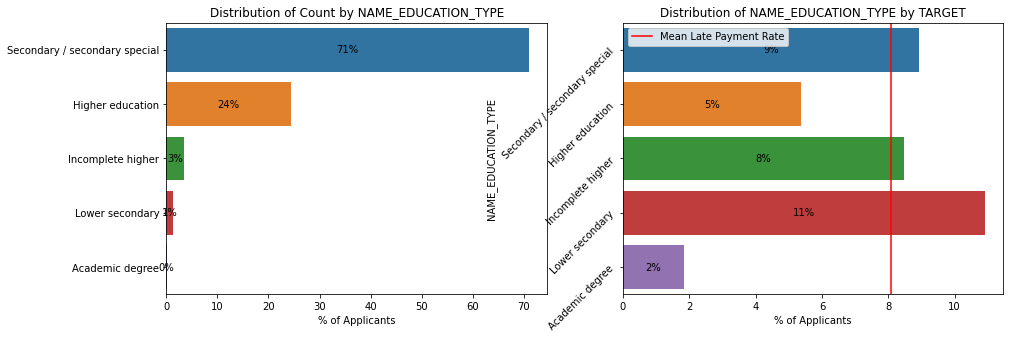

In [18]:
univariate_categorical_analyser('NAME_EDUCATION_TYPE',orient='horizontal')

<a id='NAME_FAMILY_STATUS'></a>
#### Categorical Column 5 : NAME_FAMILY_STATUS

> **Meaning of Column**.
> * NAME_FAMILY_STATUS - Family status of the client

> **Inference**.
> *  64% of the applicants are married, and have a lower default rate than the global average
> *  People who have civil marriages perform worse than traditional Marriages.

> **Conclusion**.
> * People who have Traditional Marriages perform much better than people who are Single/Not Married.
> * Applicants who are widows are the best candidate in the FAMILY STATUS Group.

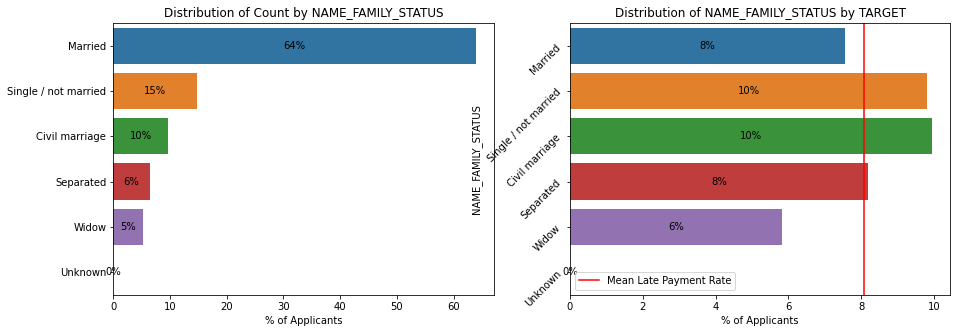

In [19]:
univariate_categorical_analyser('NAME_FAMILY_STATUS',orient='horizontal')

<a id='NAME_HOUSING_TYPE'></a>
#### Categorical Column 6 : NAME_HOUSING_TYPE
> **Meaning of Column**
> * What is the housing situation of the client (renting, living with parents, ...)

> **Inference.**
> * 9/10 Applicants are living in a House/Department, therefore the data is highly skewed towards this category. Although we have less data points, we have evidence to exercise caution against applications who live in Rented Apartments or with Parents

> **Conclusion**.
> * People living in Rented Apartments or with Parents perform almost 50% worse than those living in House/aparment.

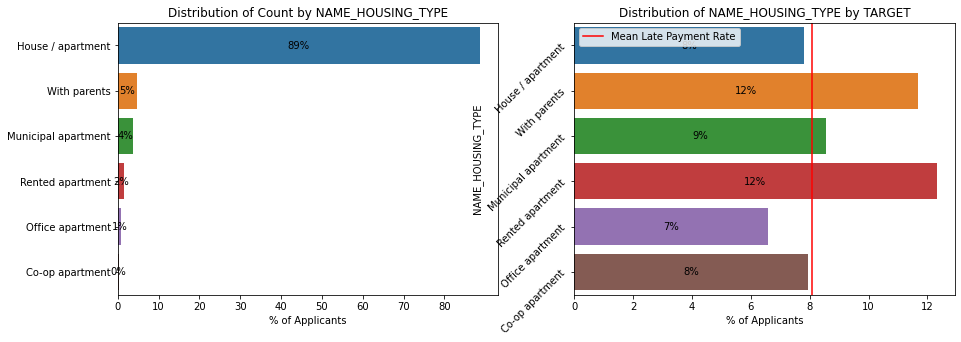

In [20]:
univariate_categorical_analyser('NAME_HOUSING_TYPE',orient='horizontal')

<a id='OCCUPATION_TYPE'></a>
#### Categorical Column 7 : OCCUPATION_TYPE


> **Meaning of Column**
> * What kind of occupation does the client have

> **Inference.**
> * **Applicants who are in low income group perform much worse than applicants with High Income Group**. (Veirfication needed with Bivariate Analysis.). 1/4 applicants is a laborer.

> **Conclusion.**
> * Low Income Groups should be avoided while considering loans. Within this group, Low Skill Laborers are the worst performing group.
> * Applicants who work in White Collar Sectors are much better compared to Blue Collar Sectors

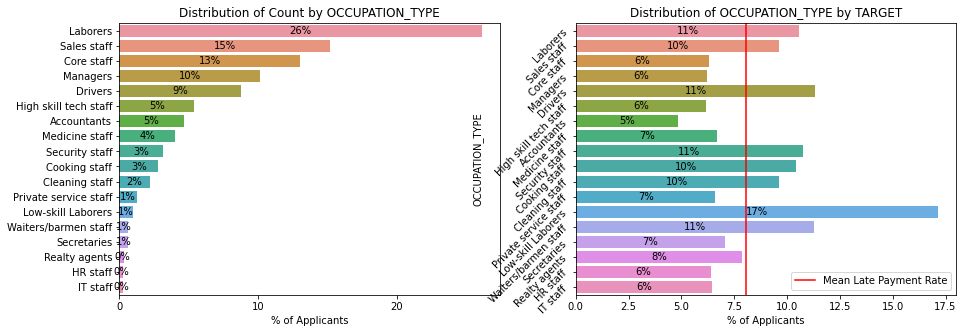

In [21]:
univariate_categorical_analyser('OCCUPATION_TYPE',orient='horizontal')

<a id='ORGANIZATION_TYPE'></a>
#### Categorical Column 8 : ORGANIZATION_TYPE

> **Meaning of Column**
> * Type of organization where client works

> **Inference.**
> * 1/3 Applicants are work in Business Organisation, and perform slighly worse than the global average, Restuarants, Construction, Agriculture , Transport  Self Employed People perform significantly worse than its counter parts

> **Conclusion.**
> * University, Services, Police, Bank are the best sectors to grant loans

##### Initial Analysis

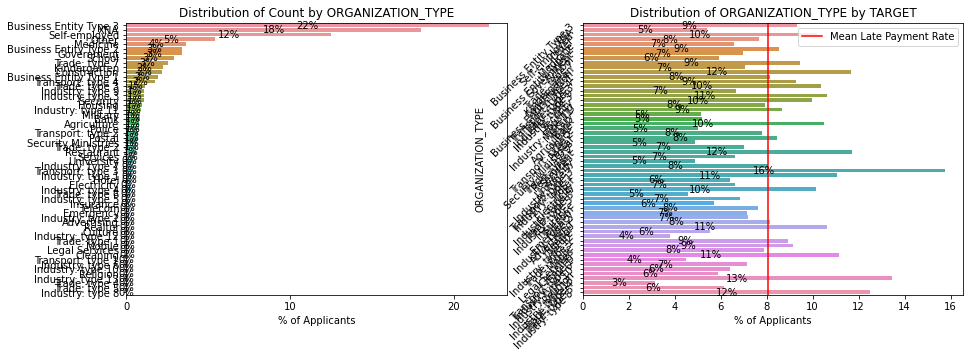

In [22]:
univariate_categorical_analyser('ORGANIZATION_TYPE',orient='horizontal')

In [23]:
print(str(application_data.ORGANIZATION_TYPE.nunique()) + " Unique Values of Organisation with Type Included")
print(str(application_data.ORGANIZATION_TYPE.str.split(' ',expand=True, n=1)[0].nunique()) + " Unique Values of Organisation without Type")
print("Marking XNA as NAN")
application_data.ORGANIZATION_TYPE = np.where(application_data.ORGANIZATION_TYPE=='XNA',np.nan, application_data.ORGANIZATION_TYPE)

58 Unique Values of Organisation with Type Included
34 Unique Values of Organisation without Type
Marking XNA as NAN


##### Creating new Column ORGANIZATION_TYPE_WITHOUT_TYPE

In [24]:
application_data['ORGANIZATION_TYPE_WITHOUT_TYPE'] = application_data.ORGANIZATION_TYPE.str.split(' ',expand=True, n=1)[0]
application_data['ORGANIZATION_TYPE_WITHOUT_TYPE'].value_counts()

Business         84529
Self-employed    38412
Other            16683
Trade:           14315
Industry:        14311
Medicine         11193
Government       10404
Transport:        8990
School            8893
Kindergarten      6880
Construction      6721
Security          5221
Housing           2958
Military          2634
Bank              2507
Agriculture       2454
Police            2341
Postal            2157
Restaurant        1811
Services          1575
University        1327
Hotel              966
Electricity        950
Insurance          597
Telecom            577
Emergency          560
Advertising        429
Realtor            396
Culture            379
Mobile             317
Legal              305
Cleaning           260
Religion            85
Name: ORGANIZATION_TYPE_WITHOUT_TYPE, dtype: int64

##### Analysing Organsations with minimum 1000 rows as evidences

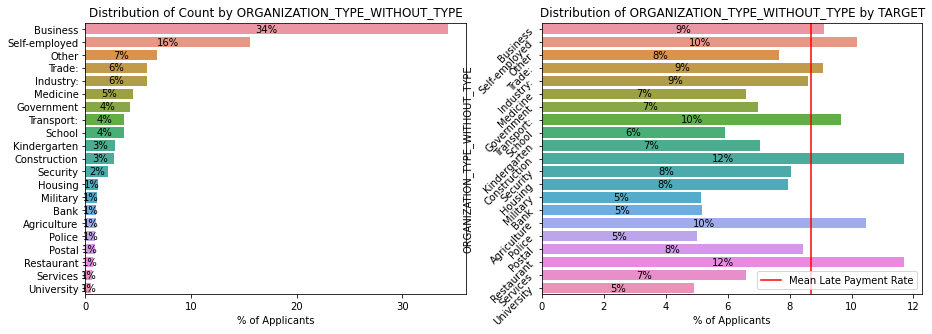

In [25]:
organisation_type_value_counts = application_data.ORGANIZATION_TYPE_WITHOUT_TYPE.value_counts().sort_values(ascending=False)
organisations_to_consider = organisation_type_value_counts[organisation_type_value_counts>1000].index.tolist()
univariate_categorical_analyser('ORGANIZATION_TYPE_WITHOUT_TYPE',orient='horizontal',application_data=application_data[application_data['ORGANIZATION_TYPE_WITHOUT_TYPE'].isin(organisations_to_consider)])

### 2. Numerical Analysis

1. [Percentile Analysis](#Percentile_Analysis)
2. [Visualisation Function](#Numeric_Univariate_Visualisation_Function)

Analysing

1. [Amount Columns](#Amount_Columns) (AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE )
2. [Time Data](#Time_Data) (DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH)
3. [REGION RATING Columns](#REGION_RATING) (REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY)
4. [Credit Bureau Columns](#Credit_Bureau)(AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR)
5. [EXT Source Columns](#EXT_Source) (EXT_SOURCE_2, EXT_SOURCE_3) 
6. [FAMILY_DATA Columns](#FAMILY_DATA) (CNT_CHILDREN, CNT_FAM_MEMBERS)


#### Creating a Yes/No Column to indicate whether the application defaulted

In [26]:
application_data['DEFAULTED'] = np.where(application_data.TARGET==1,'YES','NO')
application_data['DEFAULTED'].value_counts()

NO     282686
YES     24825
Name: DEFAULTED, dtype: int64

<a id='Percentile_Analysis'></a>
#### Calculating percentiles of data

In [27]:
amount_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
application_data[amount_columns].describe(percentiles=[.01,.10,.25,.50,.75,.90,.95,.99,.999])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,"307,511.00","307,511.00","307,499.00","307,233.00"
mean,"168,797.92","599,026.00","27,108.57","538,396.21"
std,"237,123.15","402,490.78","14,493.74","369,446.46"
min,"25,650.00","45,000.00","1,615.50","40,500.00"
1%,"45,000.00","76,410.00","6,182.91","67,500.00"
10%,"81,000.00","180,000.00","11,074.50","180,000.00"
25%,"112,500.00","270,000.00","16,524.00","238,500.00"
50%,"147,150.00","513,531.00","24,903.00","450,000.00"
75%,"202,500.00","808,650.00","34,596.00","679,500.00"
90%,"270,000.00","1,133,748.00","45,954.00","1,093,500.00"


<a id='Numeric_Univariate_Visualisation_Function'></a>
#### Generic Visualization Function

In [28]:
def univariate_numerical_analysis(column_name, quantile=.99,application_data=application_data):

    fig,ax = plt.subplots(1,2,figsize=(12, 6))
    quantile_filter = np.nanquantile(q=quantile,a=application_data[column_name])
    
    stage_application_data = application_data[application_data[column_name]<quantile_filter]
    
    sns.distplot(stage_application_data[column_name], ax=ax[0])
    ax[0].title.set_text(f'Distribution of {column_name}')
    sns.boxplot(data=stage_application_data,y=column_name,x='DEFAULTED',ax=ax[1])
    
    del stage_application_data

<a id='Amount_Columns'></a>
#### Amount Columns

1. AMT_INCOME_TOTAL (Income of the client)
2. AMT_CREDIT (Credit amount of the loan)
3. AMT_ANNUITY (Loan annuity)
4. AMT_GOODS_PRICE (For consumer loans it is the price of the goods for which the loan is given)


##### Numerical Column 1 : AMT_INCOME_TOTAL

> **Meaning of Column.**
> * Income of the client

> **Inference.**
> * There is not much difference in the mean and the median of the Salaries of those who defaulted.

> **Conclusion.**
> * The higher percentiles of those who didnt default are higher than those of who defautled.

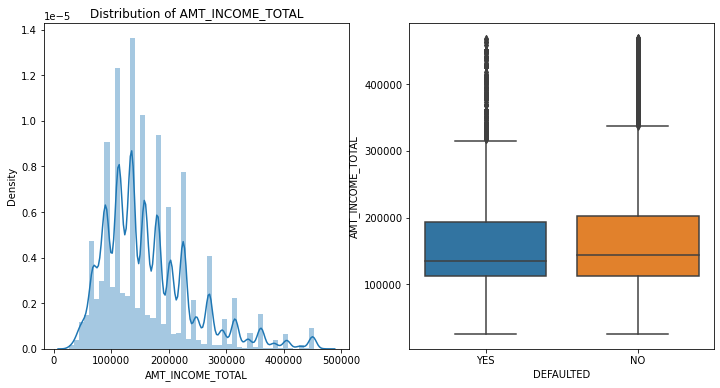

In [29]:
univariate_numerical_analysis('AMT_INCOME_TOTAL',quantile=0.99)

> 

Conclusion:
1. The higher percentiles of those who didnt default are higher than those of who defautled.


##### Numerical Column 1 : AMT_CREDIT

> **Meaning of Column.**
> * Credit amount of the loan

> **Inference.**
> * The data is right skewed and shows that median credit amount is same for those who defaulted and didnt default.

> **Conclusion.**
> * If the credit amount is high, the probabilty that the applicant will not default is higher

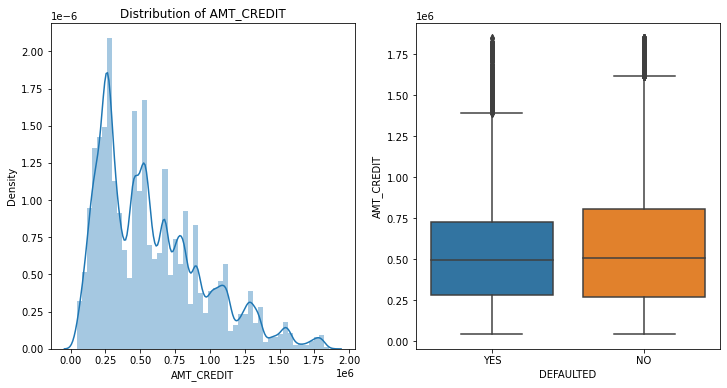

In [30]:
univariate_numerical_analysis('AMT_CREDIT',quantile=0.99)

> 

Conclusion.
1. If the credit amount is high, the probabilty that the applicant will not default is higher

##### Numerical Column 1 : AMT_ANNUITY

> **Meaning of Column.**
> * Loan annuity

> **Inference.**
> * The quantile values of both defaulted and non defaulted annutity are almost same.

> **Conclusion.**
> * People having late payments have more outliers and lowre 100 quantile

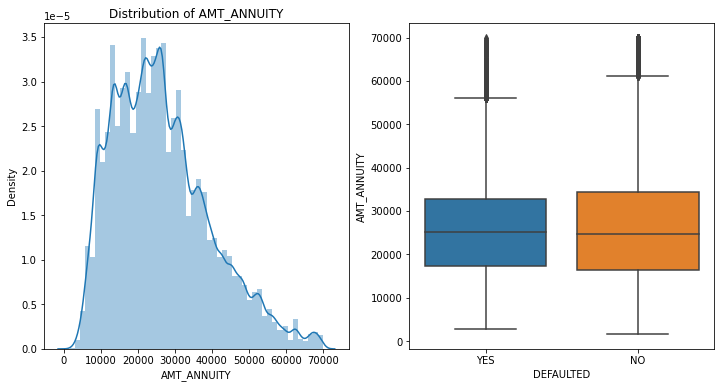

In [31]:
univariate_numerical_analysis('AMT_ANNUITY',quantile=0.99)

##### Numerical Column 1 : AMT_GOODS_PRICE

> **Meaning of Column.**
> * For consumer loans it is the price of the goods for which the loan is given

> **Inference.**
> * The quantile values for the cases of payments is almost exactly similar

> **Conclusion.**
> * Goods Price has negligible effect on the whether the applicant will default

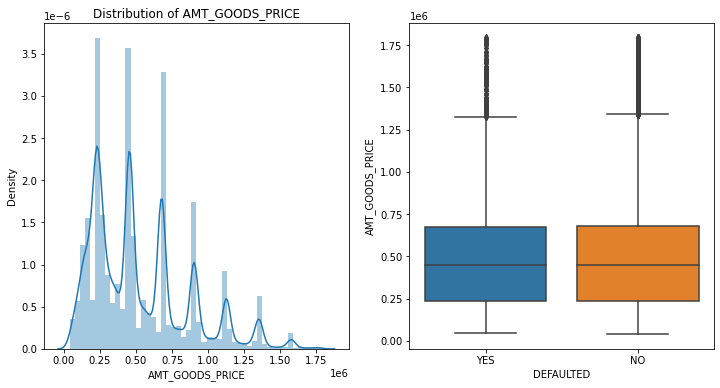

In [32]:
univariate_numerical_analysis('AMT_GOODS_PRICE',quantile=0.99)

Conclusion.

1. 

<a id='Time_Data'></a>
#### Time Data Columns

1. YEARS_BIRTH  - Client's age in days at the time of application
2. YEARS_EMPLOYED - How many days before the application the person started current employment
3. YEARS_REGISTRATION - How many days before the application did client change his registration
4. YEARS_ID_PUBLISH - How many days before the application did client change the identity document with which he applied for the loan

##### Converting days to years and taking abs value of it

In [33]:
days_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
years_columns = ['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']
application_data[years_columns] = np.abs(application_data[days_columns]/365)
application_data.drop(columns=days_columns, inplace=True)

In [34]:
application_data.loc[application_data[(application_data[years_columns]>100).any(axis=1)].index, years_columns] = np.nan

##### YEARS_BIRTH

> **Meaning of Column.**
> * Client's age in years at the time of application

> **Inference.**
> * People who are late on payments have higher age group than people who dont

> **Conclusion.**
> * Young adults and adults are more late on their payments than MidAge adults and senior citizens

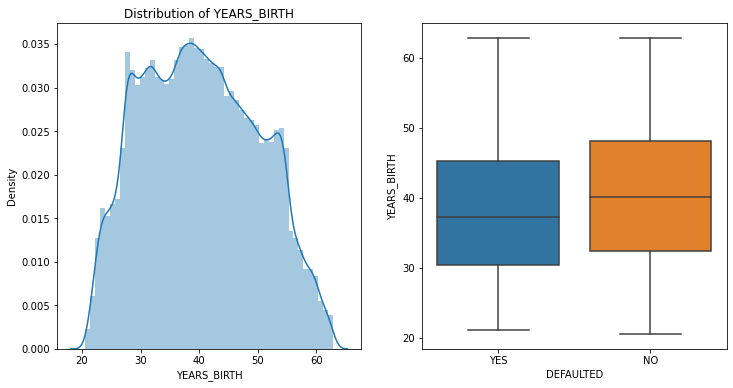

In [35]:
univariate_numerical_analysis('YEARS_BIRTH',quantile=0.99)

###### Creating bins from age

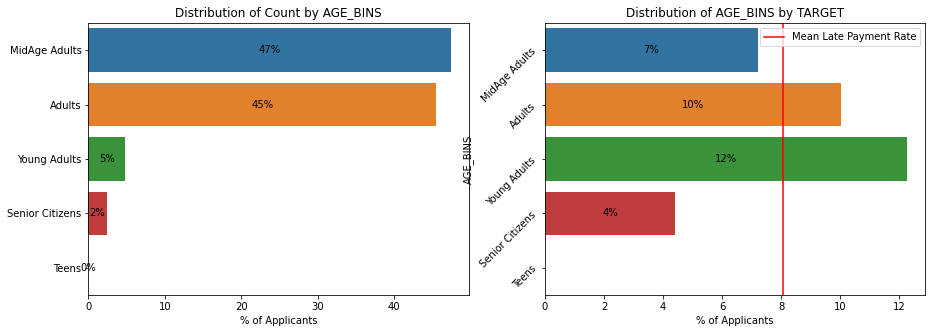

In [36]:
labels = ['Teens','Young Adults','Adults','MidAge Adults','Senior Citizens']
values = [0,15,25,40,60,100]
application_data['AGE_BINS'] = pd.cut(application_data.YEARS_BIRTH,bins=values, labels=labels)
univariate_categorical_analyser('AGE_BINS',orient='horizontal')

> Age Group of 15 to 40 are the worst performing age groups

##### YEARS_EMPLOYED

> **Meaning of Column.**
> * How many days before the application the person started current employment

> **Inference.**
> * People who have higher work experience tend to default less

> **Conclusion.**
> * People having experience between 0-5 years are more likely to behind on their payments

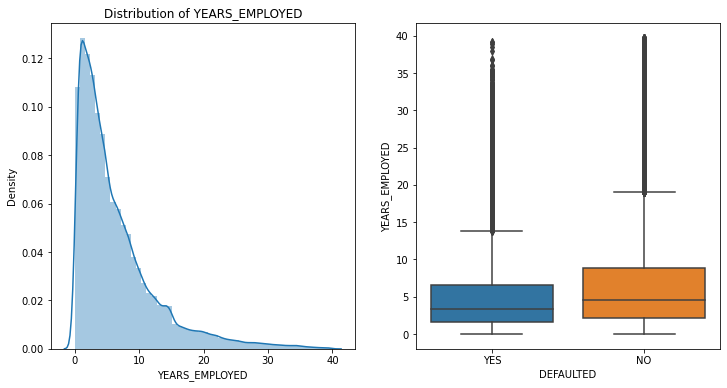

In [37]:
univariate_numerical_analysis('YEARS_EMPLOYED',quantile=0.999)

> People who are employed more tend to default less

Creating Age Bins for Years Employed

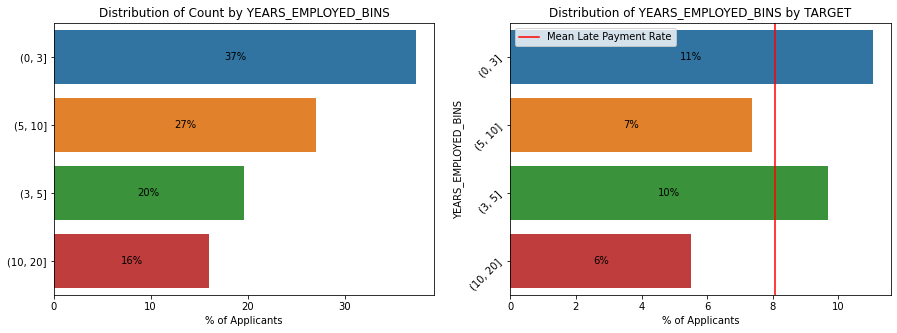

In [38]:
application_data['YEARS_EMPLOYED_BINS']= pd.cut(application_data.YEARS_EMPLOYED,bins=[0,3,5,10,20])
univariate_categorical_analyser('YEARS_EMPLOYED_BINS',orient='horizontal')

##### YEARS_REGISTRATION

> **Meaning of Column.**
> * How many years before the application did client change his registration

> **Inference.**
> * The qunatile values for the payment cases are almost similar

> **Conclusion.**
> * This feature is not a key influencer on the late payment attribute

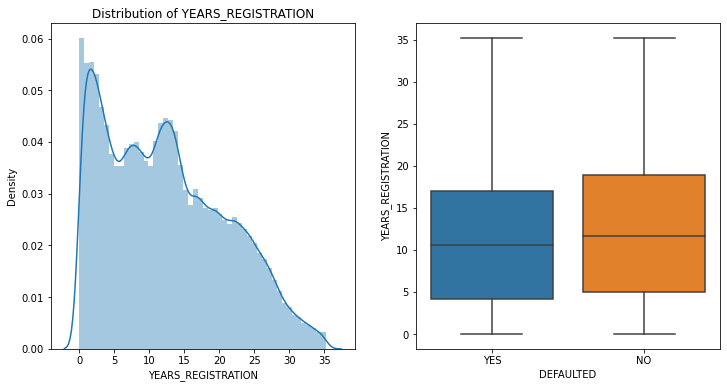

In [39]:
univariate_numerical_analysis('YEARS_REGISTRATION',quantile=0.99)

> The Registration of the application does not affect the Default Rate significantly

##### YEARS_ID_PUBLISH

> **Meaning of Column.**
> * How many days before the application did client change the identity document with which he applied for the loan

> **Inference.**
> * The qunatile values for the payment cases are almost similar

> **Conclusion.**
> * This feature is not a key influencer on the late payment attribute

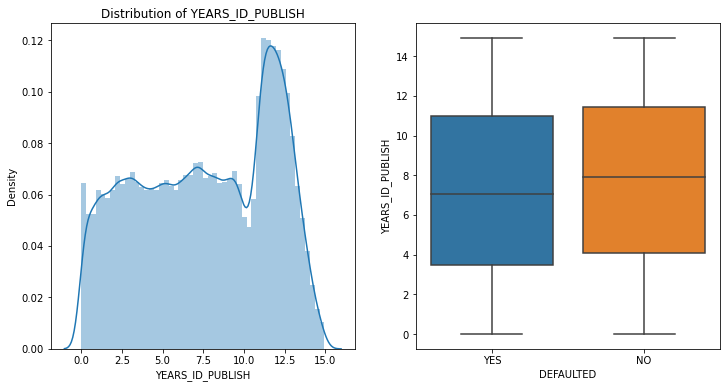

In [40]:
univariate_numerical_analysis('YEARS_ID_PUBLISH',quantile=0.99)

> The Date of Registration Publish of the application does not affect the Default Rate significantly


<a id='REGION_RATING'></a>
#### Region Rating Data

1. REGION_RATING_CLIENT - Our rating of the region where client lives (1,2,3)
2. REGION_RATING_CLIENT_W_CITY - Our rating of the region where client lives with taking city into account (1,2,3)

##### Creating Bins from Region Data

In [41]:
application_data['REGION_RATING_CLIENT'] = pd.cut(application_data.REGION_RATING_CLIENT, bins=[0,1,2,3],labels=['Low','Medium','High'])
application_data['REGION_RATING_CLIENT_W_CITY'] = pd.cut(application_data.REGION_RATING_CLIENT_W_CITY, bins=[0,1,2,3],labels=['Low','Medium','High'])

##### REGION_RATING_CLIENT

> **Meaning of Column.**
> * Our rating of the region where client lives (1,2,3)

> **Inference.**
> * The lower the rating the lesser is the chance of an applicant being late on his payments

> **Conclusion.**
> * Region Rating is an important factor that affects the Late Payment Feature

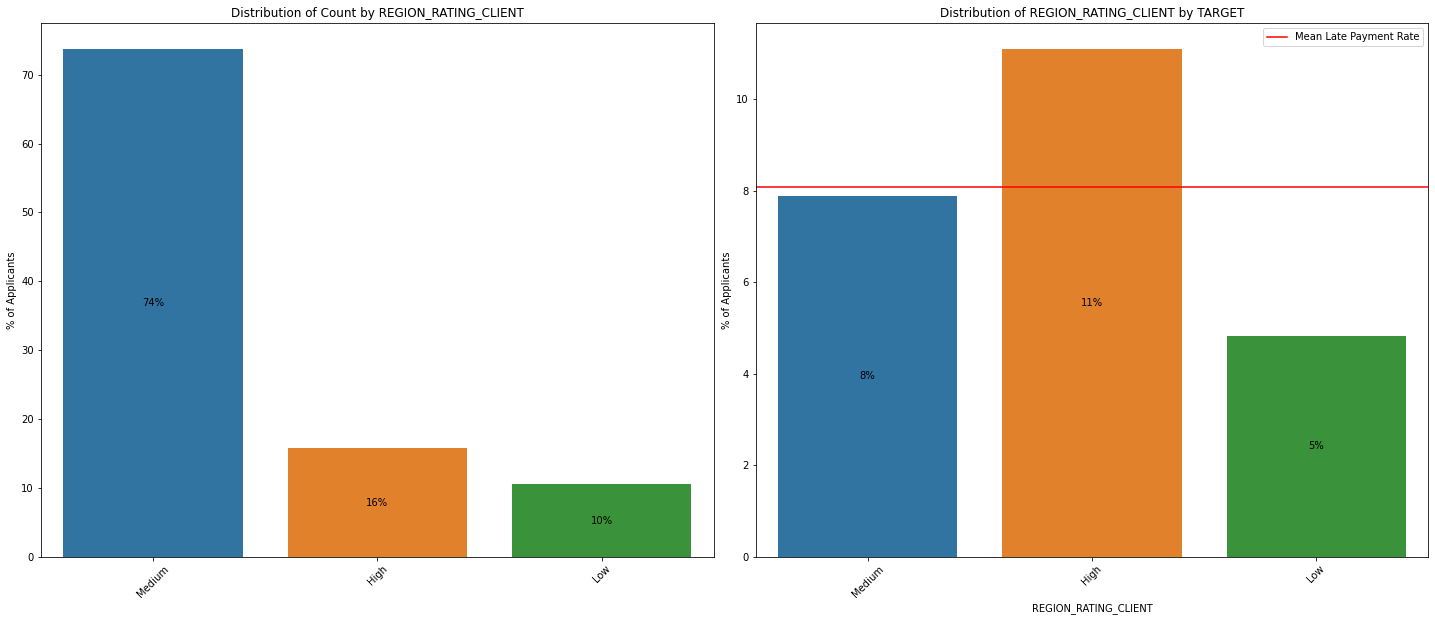

In [42]:
univariate_categorical_analyser('REGION_RATING_CLIENT')

##### REGION_RATING_CLIENT_W_CITY

> **Meaning of Column.**
> * Our rating of the region where client lives with taking city into account (1,2,3)

> **Inference.**
> * The lower the rating the lesser is the chance of an applicant being late on his payments

> **Conclusion.**
> * REGION_RATING_CLIENT_W_CITY Rating is an important factor that affects the Late Payment Feature

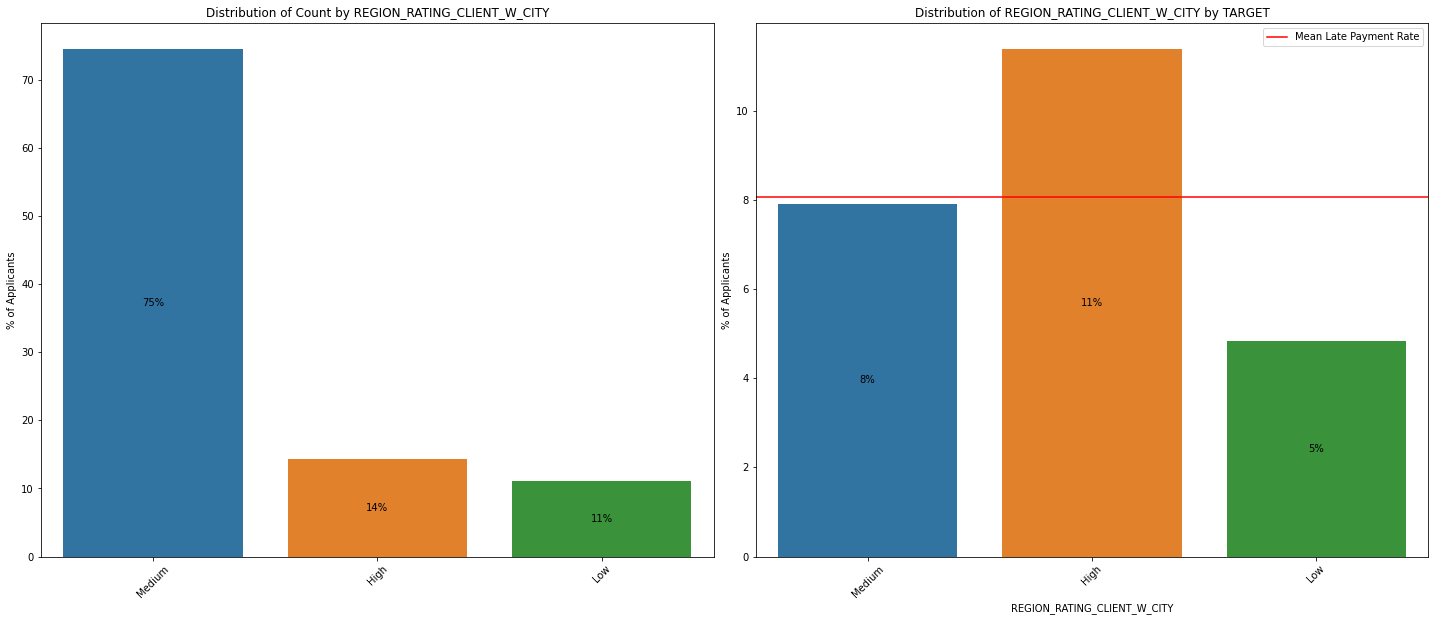

In [43]:
univariate_categorical_analyser('REGION_RATING_CLIENT_W_CITY')

> The Rating of the client is an important measure where the lower the score of the rating better is the chance of non late payments

<a id='Credit_Bureau'></a>
#### Credit Bureau Columns 

> **Meaning of Column.**
> * AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application
> * AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one DAY before application
> * AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one WEEK before application
> * AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one MON before application
> * AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client one QRT before application
> * AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one YEAR before application


> **Inference.**
> * Although The Credit Bureau shows some variation in the Default rate, the values are not significant enough to show any variation

> **Conclusion.**
> * The Enquiries to the Credit Bureau has little effect on the Late Payment Data

##### Assigning np.nan to data more than 99.9% Quantile

In [44]:
credit_bureau_columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
credit_bureau_999_quantile = application_data[credit_bureau_columns].describe([0.90,.99,.95,0.999]).loc['99.9%']
application_data.loc[application_data[(application_data[credit_bureau_columns] > credit_bureau_999_quantile).any(axis=1)].index,credit_bureau_columns] = np.nan

##### Qunatile Plots

In [45]:
application_data[credit_bureau_columns].describe([0.25,0.5,0.75,.90,.99,.95])

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"265,274.00","265,274.00","265,274.00","265,274.00","265,274.00","265,274.00"
mean,0.01,0.00,0.03,0.26,0.26,1.89
std,0.08,0.07,0.18,0.83,0.60,1.85
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,3.00
90%,0.00,0.00,0.00,1.00,1.00,4.00
95%,0.00,0.00,0.00,1.00,2.00,6.00
99%,0.00,0.00,1.00,4.00,2.00,8.00


##### Credit Bureau Enquiry Plots

<AxesSubplot:xlabel='DEFAULTED', ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

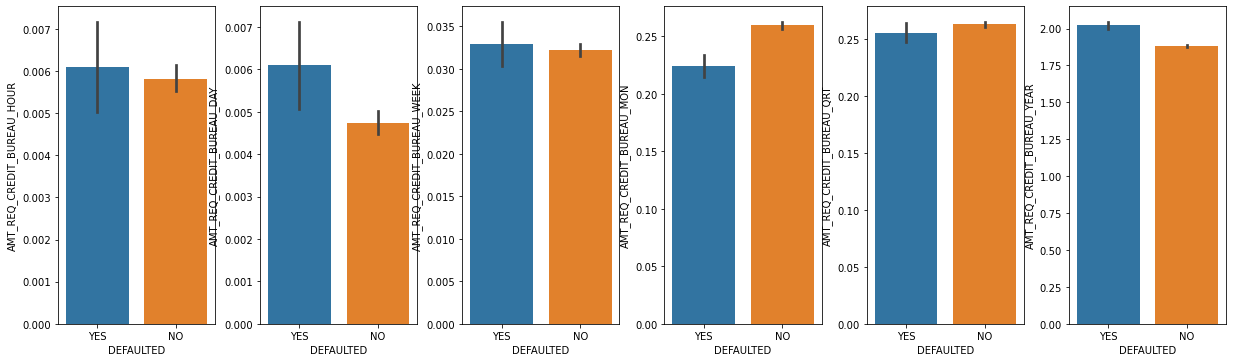

In [46]:
fig,ax = plt.subplots(1,6,figsize=(17,5))
fig.tight_layout()
sns.barplot(data=application_data, y='AMT_REQ_CREDIT_BUREAU_HOUR',x='DEFAULTED',ax=ax[0])
sns.barplot(data=application_data, y='AMT_REQ_CREDIT_BUREAU_DAY',x='DEFAULTED',ax=ax[1])
sns.barplot(data=application_data, y='AMT_REQ_CREDIT_BUREAU_WEEK',x='DEFAULTED',ax=ax[2])
sns.barplot(data=application_data, y='AMT_REQ_CREDIT_BUREAU_MON',x='DEFAULTED',ax=ax[3])
sns.barplot(data=application_data, y='AMT_REQ_CREDIT_BUREAU_QRT',x='DEFAULTED',ax=ax[4])
sns.barplot(data=application_data, y='AMT_REQ_CREDIT_BUREAU_YEAR',x='DEFAULTED',ax=ax[5])

<a id='EXT_Source'></a>
#### EXT Source Data

> **Meaning of Column.**
> * EXT_SOURCE_2 - Normalized score from external data source
> * EXT_SOURCE_3 - Normalized score from external data source

> **Inference.**
> * People who have higher external ratings tend to default less on their payments

> **Conclusion.**
> * External Source Data is an important factor in determining the applicants default probability




<AxesSubplot:xlabel='DEFAULTED', ylabel='EXT_SOURCE_3'>

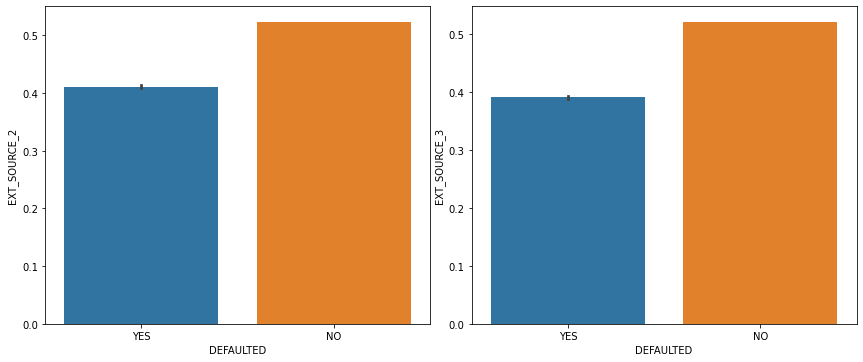

In [47]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
fig.tight_layout()
sns.barplot(data=application_data, y='EXT_SOURCE_2',x='DEFAULTED',ax=ax[0])
sns.barplot(data=application_data, y='EXT_SOURCE_3',x='DEFAULTED',ax=ax[1])

> Applications that have a higher External Source Rating have a better chance at not Defaulting

<a id='FAMILY_DATA'></a>
#### FAMILY DATA

> **Meaning of Column.**
> * CNT_CHILDREN - Number of children the client has
> * CNT_FAM_MEMBERS - Number of Family Member the client has

> **Inference.**
> * Family Members Data is not a significant measure to check if the person defaulted

> **Conclusion.**
> * Family Members Data is not a significant measure to check if the person defaulted


###### Assigning np.nan to data above 99% quantile data

In [48]:
family_columns = ['CNT_CHILDREN','CNT_FAM_MEMBERS']
family_999_quantile = application_data[family_columns].describe([0.90,.99,.95,0.999]).loc['99%']
application_data.loc[application_data[(application_data[family_columns] > family_999_quantile).any(axis=1)].index,family_columns] = np.nan
application_data[family_columns].describe()

,CNT_CHILDREN,CNT_FAM_MEMBERS
count,"306,956.00","306,954.00"
mean,0.41,2.14
std,0.70,0.89
min,0.00,1.00
25%,0.00,2.00
50%,0.00,2.00
75%,1.00,3.00
max,3.00,5.00


###### Plots

<AxesSubplot:xlabel='DEFAULTED', ylabel='CNT_FAM_MEMBERS'>

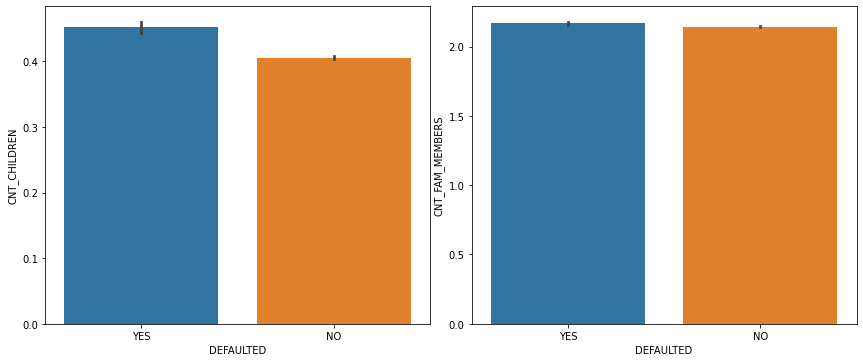

In [49]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
fig.tight_layout()
sns.barplot(data=application_data, y='CNT_CHILDREN',x='DEFAULTED',ax=ax[0])
sns.barplot(data=application_data, y='CNT_FAM_MEMBERS',x='DEFAULTED',ax=ax[1])

## Bivariate Analysis

### Categorical vs Numerical

#### GENDER vs INCOME vs TARGET

Conclusion
> Even though females have less total income they are less like to be late on their payments
i.e Total Income is not a key indicator of the Target Variable

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

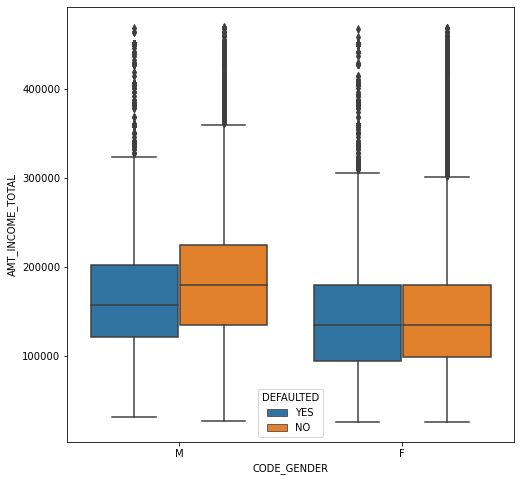

In [50]:
plt.figure(figsize=(8,8))
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',hue='DEFAULTED', data=application_data[application_data.AMT_INCOME_TOTAL<np.nanquantile(application_data.AMT_INCOME_TOTAL,.99)])

#### EDUCATION VS INCOME VS TARGET

Conclusion:

>1. From Univariate Analysis we known that Education is a key indicator for Default Rate.
>2. However the Income is not a key indicator within education as all groups except 'Academic' group have almost the same percentiles
>3. In Academic Degree, the applicants who have a very income, have a very high probability of defaulting

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

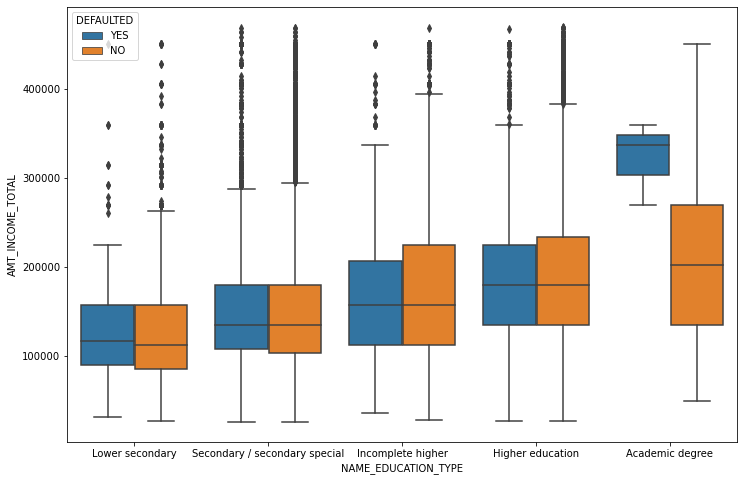

In [51]:
plt.figure(figsize=(12,8))
order = ['Lower secondary','Secondary / secondary special','Incomplete higher', 'Higher education',  'Academic degree']
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',order=order,hue='DEFAULTED', data=application_data[application_data.AMT_INCOME_TOTAL<np.nanquantile(application_data.AMT_INCOME_TOTAL,.99)])

#### EDUCATION VS EXT_SOURCE VS TARGET

Conclusion : 
1. EXT_SOURCE_2 and EXT_SOURCE_3 are very strong indicators of default rate in all family status 

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='EXT_SOURCE_3'>

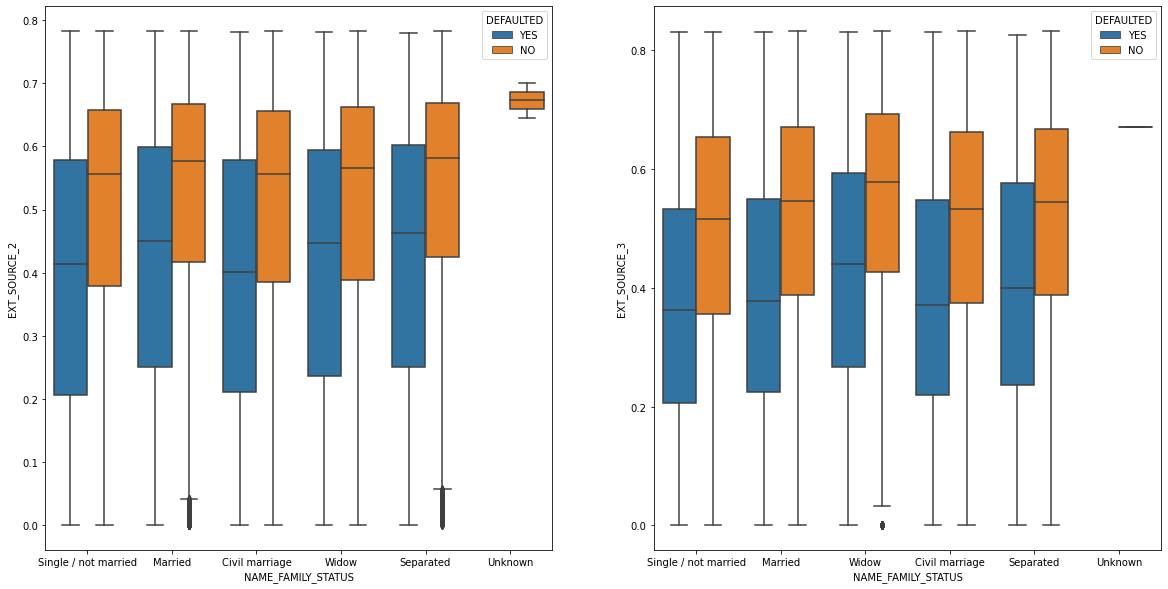

In [52]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x='NAME_FAMILY_STATUS',y='EXT_SOURCE_2',hue='DEFAULTED', data=application_data[application_data.EXT_SOURCE_2<np.nanquantile(application_data.EXT_SOURCE_2,.99)], ax=ax[0])
sns.boxplot(x='NAME_FAMILY_STATUS',y='EXT_SOURCE_3',hue='DEFAULTED', data=application_data[application_data.EXT_SOURCE_3<np.nanquantile(application_data.EXT_SOURCE_3,.99)], ax=ax[1])

### CORRELATION CHART

#### Correlation vs Target Variable

<AxesSubplot:xlabel='TARGET', ylabel='index'>

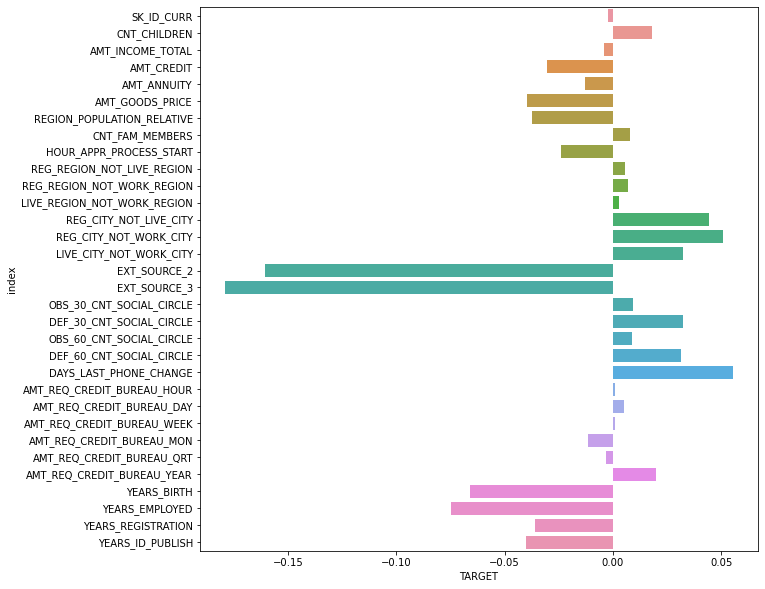

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(data=application_data.corr()['TARGET'].reset_index().drop(index=1),y='index',x='TARGET')

#### Interdependent Variables

<AxesSubplot:>

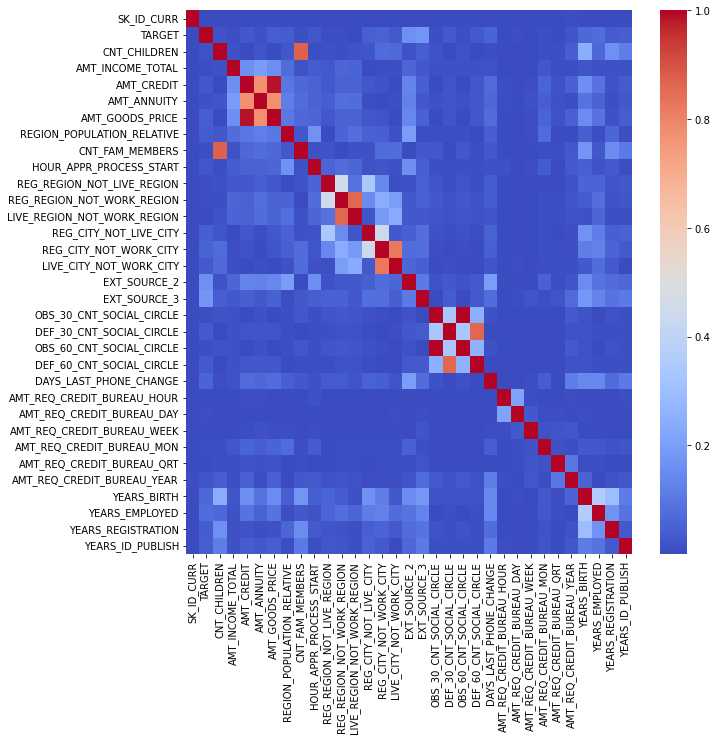

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(application_data.corr().abs(),cmap='coolwarm')

#### Interdependent Columns having the maximum correlation

Text(0.5, 1.0, 'Columns having Maximum Correlation')

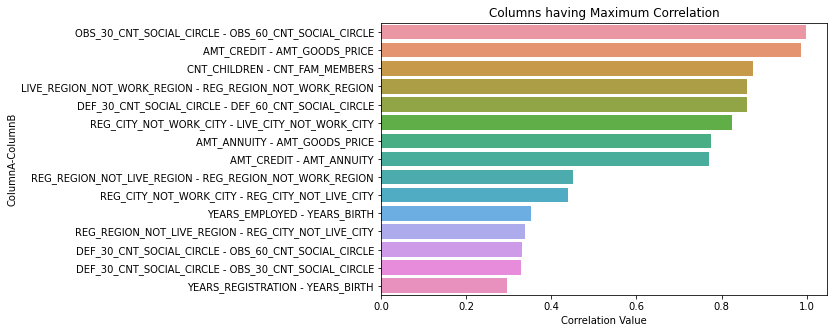

In [55]:
temp = application_data.corr().reset_index().melt(id_vars='index')
temp['abs_corr']= temp['value'].abs()
temp.columns = ['Column A','Column B', "Correlation Value",'Absolute Correlation']

temp = temp[temp['Absolute Correlation']<1].sort_values(by='Absolute Correlation').drop_duplicates().sort_values(by='Absolute Correlation').nlargest(30,columns='Absolute Correlation').reset_index().drop(index=[i for i in range(0,30) if i%2==0], columns='index')
temp['ColumnA-ColumnB'] = temp['Column A'] + " - "+temp['Column B']
temp.drop(columns=['Column A','Column B'],inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(y='ColumnA-ColumnB',x='Correlation Value',data=temp)
plt.title('Columns having Maximum Correlation')

## Previous Application Data

In [56]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",NaN,"607,500.00",THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",NaN,"112,500.00",TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",NaN,"450,000.00",MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",NaN,"337,500.00",THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Shaping of Data

In [57]:
print("Numbre of Rows : ",application_data.shape[0])
print("Number of Columns : ",application_data.shape[1])

Numbre of Rows :  307511
Number of Columns :  49


### NULL Value Analysis

In [58]:
null_values = (previous_application.isna().sum()*100/previous_application.shape[0]).sort_values(ascending=False)
null_values

RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
AMT_DOWN_PAYMENT              53.64
RATE_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE               49.12
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_TERMINATION              40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
DAYS_FIRST_DRAWING            40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
AMT_CREDIT                     0.00
NAME_YIELD_GROUP               0.00
NAME_PORTFOLIO                 0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
SK_ID_PREV                     0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_CURR                     0.00
DAYS_DECISION               

### Dropping Columns with more than 40% Nulls

In [59]:
previous_application.drop(columns=null_values[null_values>40].index.tolist(),inplace=True)
print(f"Dropped {len(null_values[null_values>40].index.tolist())} Columns")
print("New Number of Rows : ",application_data.shape[0])
print("New Number of Columns : ",application_data.shape[1])

Dropped 11 Columns
New Number of Rows :  307511
New Number of Columns :  49


#### Number of Previous Applicants

> Conclusion
-Most of the people have less than 10 previous loans 

<AxesSubplot:xlabel='SK_ID_CURR', ylabel='Density'>

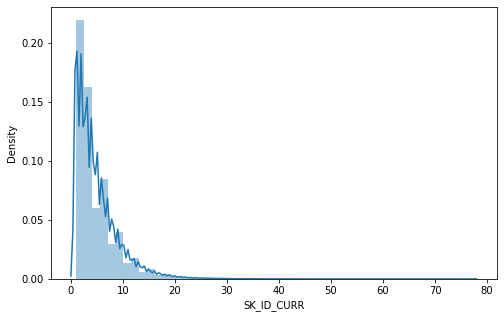

In [60]:
plt.figure(figsize=(8,5))
sns.distplot(previous_application.SK_ID_CURR.value_counts())

#### DISTRIBUTION OF APPROVED STATUS

Conclusion :
> Most of the previous applications

<AxesSubplot:>

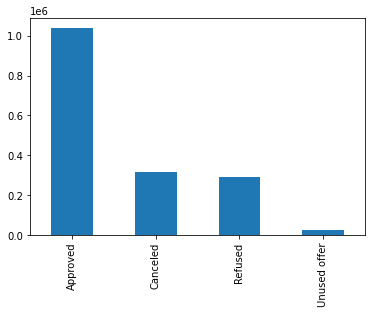

In [61]:
previous_application.NAME_CONTRACT_STATUS.value_counts().plot.bar()

#### AMOUNT COLUMNS VS NAME_CONTRACT_STATUS

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE'>

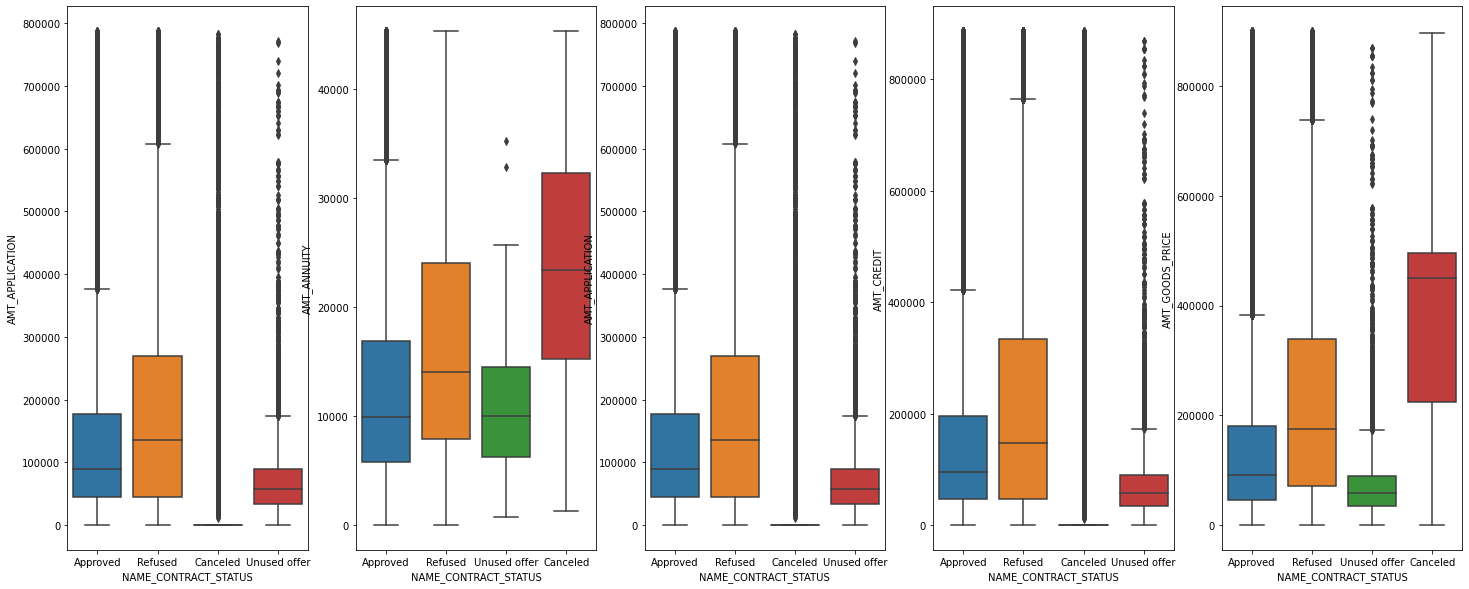

In [62]:
fi,ax = plt.subplots(1,5,figsize=(25,10))

column = 'AMT_APPLICATION'
sns.boxplot(data=previous_application[previous_application[column] < np.nanquantile(previous_application[column],q=0.95)]
, x='NAME_CONTRACT_STATUS',y=column,ax=ax[0])

column = 'AMT_ANNUITY'
sns.boxplot(data=previous_application[previous_application[column] < np.nanquantile(previous_application[column],q=0.95)]
, x='NAME_CONTRACT_STATUS',y=column,ax=ax[1])
            
            
column = 'AMT_APPLICATION'
sns.boxplot(data=previous_application[previous_application[column] < np.nanquantile(previous_application[column],q=0.95)]
, x='NAME_CONTRACT_STATUS',y=column,ax=ax[2])
            
            
column = 'AMT_CREDIT'
sns.boxplot(data=previous_application[previous_application[column] < np.nanquantile(previous_application[column],q=0.95)]
, x='NAME_CONTRACT_STATUS',y=column,ax=ax[3])
            
            
column = 'AMT_GOODS_PRICE'
sns.boxplot(data=previous_application[previous_application[column] < np.nanquantile(previous_application[column],q=0.95)]
, x='NAME_CONTRACT_STATUS',y=column,ax=ax[4])

#### Creating new columns for APPROVED and REJECTED Columns

In [63]:
previous_application['CONTRACT_APPROVED'] = previous_application.NAME_CONTRACT_STATUS.apply(lambda x : 1 if x=='Approved' else 0)
previous_application['CONTRACT_REFUSED'] = previous_application.NAME_CONTRACT_STATUS.apply(lambda x : 1 if x=='Refused' else 0)
previous_application['CONTRACT_CANCELLED'] = previous_application.NAME_CONTRACT_STATUS.apply(lambda x : 1 if x=='Cancelled' else 0)
previous_application['CONTRACT_UNUSED'] = previous_application.NAME_CONTRACT_STATUS.apply(lambda x : 1 if x=='Unused offer' else 0)
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CONTRACT_APPROVED,CONTRACT_REFUSED,CONTRACT_CANCELLED,CONTRACT_UNUSED
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00","17,145.00",SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,1,0,0,0
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00","607,500.00",THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,1,0,0,0
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50","112,500.00",TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,1,0,0,0
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00","450,000.00",MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,1,0,0,0
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00","337,500.00",THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,0,1,0,0


In [64]:

def univariate_categorical_approved_rejected_analyser(column_name,orient='vertical',application_data=application_data):

    normalized_value_counts = (application_data[column_name].value_counts(normalize=True)*100).sort_values(ascending=False)
    order_of_columns = normalized_value_counts.index
    

    
    if orient=='vertical':
        fig,ax = plt.subplots(1,3,figsize=(20, 6))
        fig.tight_layout()
        sns.barplot(x=normalized_value_counts.index, y=normalized_value_counts,orient=orient, order = order_of_columns, ax=ax[0])

        ax[0].title.set_text(f'Distribution of Count by {column_name}')
        ax[0].set_ylabel('% of Applicants')
        ax[0].set_yticks(ticks=np.arange(0,max(normalized_value_counts),10))
        ax[0].bar_label(ax[0].containers[-1], fmt='%.0f%%', label_type='center')

        ditribution_by_target = (application_data.groupby(column_name)['CONTRACT_APPROVED'].mean()*100)
        sns.barplot(y=ditribution_by_target,x=ditribution_by_target.index,orient=orient,order=order_of_columns,ax=ax[1])
        ax[1].axhline(y=application_data['CONTRACT_APPROVED'].mean()*100,color='red',label='Mean Approved Rate')
        ax[1].title.set_text(f'Distribution of {column_name} by APPROVED STATUS')
        ax[1].set_ylabel(f'% of APPROVED Applicants')
        plt.legend()
        ax[1].bar_label(ax[1].containers[-1], fmt='%.0f%%', label_type='center')

        ditribution_by_target = (application_data.groupby(column_name)['CONTRACT_REFUSED'].mean()*100)
        sns.barplot(y=ditribution_by_target,x=ditribution_by_target.index,orient=orient,order=order_of_columns,ax=ax[2])
        ax[2].axhline(y=application_data['CONTRACT_REFUSED'].mean()*100,color='red',label='Mean Rejected Rate')
        ax[2].title.set_text(f'Distribution of {column_name} by REJECTED STATUS')
        ax[2].set_ylabel(f'% of REJECTED Applicants')
        plt.legend()
        ax[2].bar_label(ax[2].containers[-1], fmt='%.0f%%', label_type='center')
    else:
        fig,ax = plt.subplots(3,1,figsize=(6, 20))
        sns.barplot(y=normalized_value_counts.index, x=normalized_value_counts,orient=orient, order = order_of_columns, ax=ax[0])

        ax[0].title.set_text(f'Distribution of Count by {column_name}')
        ax[0].set_xlabel('% of Applicants')
        ax[0].set_xticks(ticks=np.arange(0,max(normalized_value_counts),10))
        ax[0].bar_label(ax[0].containers[-1], fmt='%.0f%%', label_type='center')

        ditribution_by_target = (application_data.groupby(column_name)['CONTRACT_APPROVED'].mean()*100)
        sns.barplot(x=ditribution_by_target,y=ditribution_by_target.index,orient=orient,order=order_of_columns,ax=ax[1])
        ax[1].axvline(x=application_data['CONTRACT_APPROVED'].mean()*100,color='red',label='Mean Approved Rate')
        ax[1].title.set_text(f'Distribution of {column_name} by APPROVED STATUS')
        ax[1].set_xlabel(f'% of APPROVED Applicants')
        plt.legend()
        ax[1].bar_label(ax[1].containers[-1], fmt='%.0f%%', label_type='center')

        ditribution_by_target = (application_data.groupby(column_name)['CONTRACT_REFUSED'].mean()*100)
        sns.barplot(x=ditribution_by_target,y=ditribution_by_target.index,orient=orient,order=order_of_columns,ax=ax[2])
        ax[2].axvline(x=application_data['CONTRACT_REFUSED'].mean()*100,color='red',label='Mean Rejected Rate')
        ax[2].title.set_text(f'Distribution of {column_name} by REJECTED STATUS')
        ax[2].set_xlabel(f'% of REJECTED Applicants')
        plt.legend()
        ax[2].bar_label(ax[2].containers[-1], fmt='%.0f%%', label_type='center')

#### NAME_CONTRACT_TYPE VS PREVIOUS APPLICATION STATUS

Conclusion :
> 86% of Previous Consumer Loans were approved
> 26% of Previous Revolving Loans were approved

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


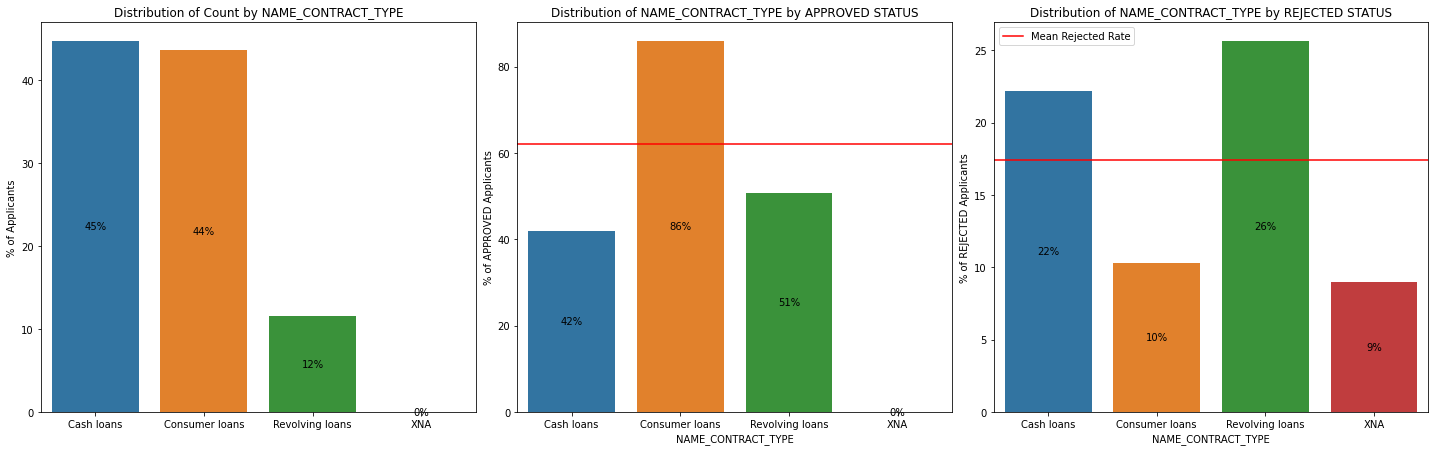

In [65]:
univariate_categorical_approved_rejected_analyser('NAME_CONTRACT_TYPE',application_data=previous_application)

#### NAME_CLIENT_TYPE VS PREVIOUS APPLICATION STATUS

#### NAME_CONTRACT_TYPE VS PREVIOUS APPLICATION STATUS

Conclusion :
> 93% of Previous New  Loans were approved
> Most of the rejections were for repeaters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


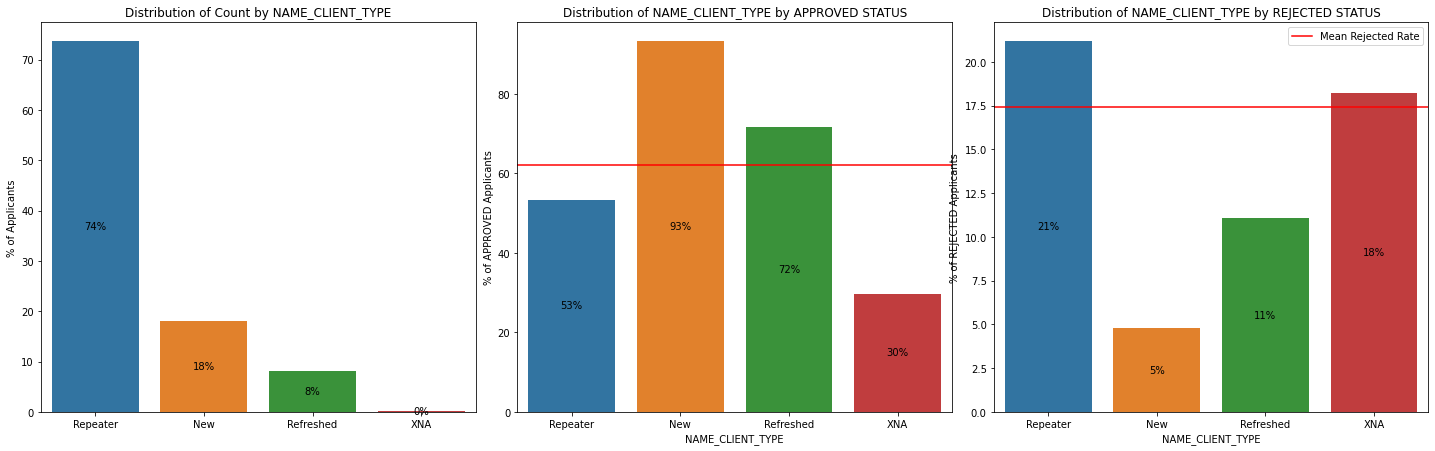

In [66]:
univariate_categorical_approved_rejected_analyser('NAME_CLIENT_TYPE',application_data=previous_application,orient='vertical')

#### MERGING PREVIOUS APPLICATIONS AND CURRENT APPLICATIONS

In [67]:
merged_data = pd.merge(left=previous_application, right=application_data, on='SK_ID_CURR')

#### SHAPE OF MERGED DATA

In [68]:
print("New Number of Rows : ",merged_data.shape[0])
print("New Number of Columns : ",merged_data.shape[1])

New Number of Rows :  1413701
New Number of Columns :  78


#### PREVIOUS DEFAULT VS CURRENT DEFAULT

Conclusion : 
1) if the previous applications were approved there is a higher chance of not being late of payments

<AxesSubplot:xlabel='DEFAULTED', ylabel='CONTRACT_REFUSED'>

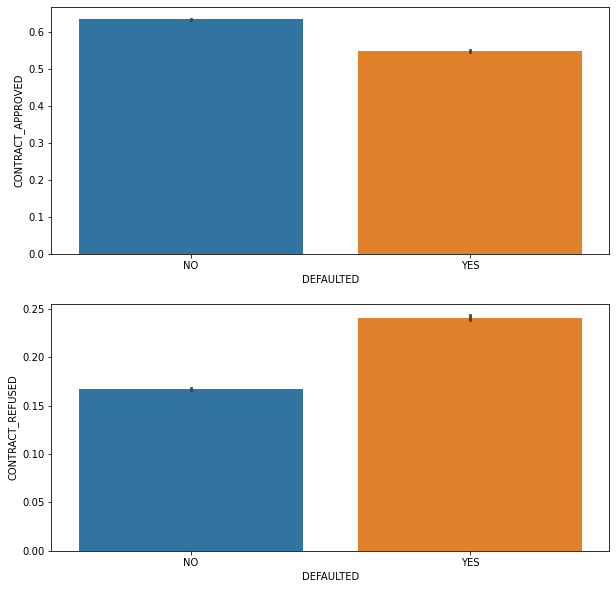

In [69]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
sns.barplot(x='DEFAULTED',y='CONTRACT_APPROVED',data=merged_data,ax=ax[0])
sns.barplot(x='DEFAULTED',y='CONTRACT_REFUSED',data=merged_data,ax=ax[1])

#### AGE VS CONTRACT REFUSED

Conclusion:
> Young Adults tend to get their applicants rejected more

<AxesSubplot:xlabel='AGE_BINS', ylabel='CONTRACT_REFUSED'>

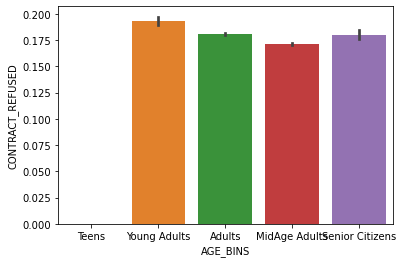

In [70]:
sns.barplot(y=merged_data['CONTRACT_REFUSED'],x=merged_data.AGE_BINS)

#### DAYS_DECISION VS LATE PAYMENT
Conclusion:
> if it takes more time to make a decision then the default rate is like more

<AxesSubplot:xlabel='DEFAULTED', ylabel='DAYS_DECISION'>

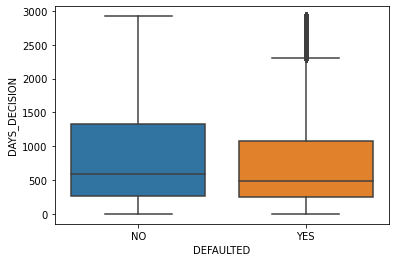

In [71]:
merged_data.DAYS_DECISION = merged_data.DAYS_DECISION.abs()
sns.boxplot(data=merged_data, y='DAYS_DECISION',x='DEFAULTED')

In [72]:
merged_data[['TARGET','CONTRACT_APPROVED','CONTRACT_REFUSED','CONTRACT_CANCELLED','CONTRACT_UNUSED']].corr()

,TARGET,CONTRACT_APPROVED,CONTRACT_REFUSED,CONTRACT_CANCELLED,CONTRACT_UNUSED
TARGET,1.00,-0.05,0.05,NaN,-0.00
CONTRACT_APPROVED,-0.05,1.00,-0.59,NaN,-0.17
CONTRACT_REFUSED,0.05,-0.59,1.00,NaN,-0.06
CONTRACT_CANCELLED,NaN,NaN,NaN,NaN,NaN
CONTRACT_UNUSED,-0.00,-0.17,-0.06,NaN,1.00


#### TYPE OF APPLICANT VS CURRENT APPLICANT STATUS

> Conclusion :
> If the previous applications had more walk ins than were sold to them, they have a higher chance of being late on their payments

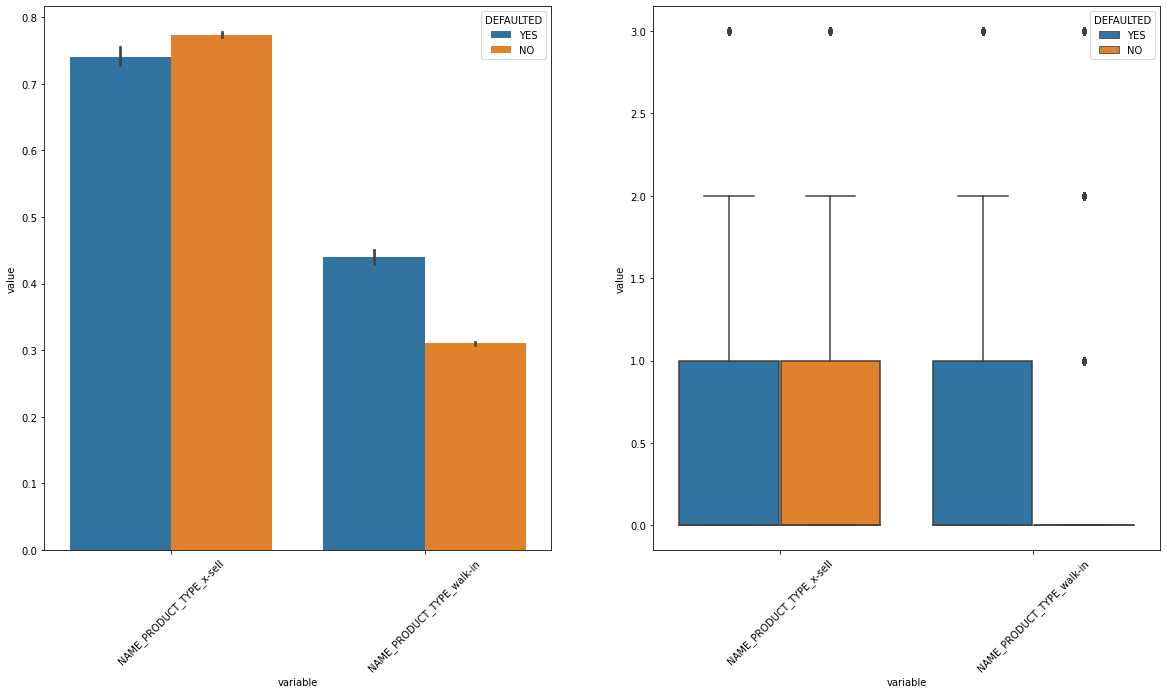

In [73]:
out = pd.get_dummies(merged_data,columns=['NAME_PRODUCT_TYPE'],prefix='NAME_PRODUCT_TYPE').groupby('SK_ID_CURR')['NAME_PRODUCT_TYPE_x-sell','NAME_PRODUCT_TYPE_walk-in'].sum()
out = pd.merge(out, application_data, on='SK_ID_CURR')[['NAME_PRODUCT_TYPE_x-sell','NAME_PRODUCT_TYPE_walk-in','DEFAULTED']]
out = out.melt(id_vars='DEFAULTED')
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.barplot(x='variable',y='value',hue='DEFAULTED',data=out[out.value<np.nanquantile(out.value,0.95)], ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.boxplot(x='variable',y='value',hue='DEFAULTED',data=out[out.value<np.nanquantile(out.value,0.95)], ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)

#### PREVIOUS INTEREST RATE VS CURRENT LATE PAYMENTS

> Conclusion :
>People who have had a higher interest rate in the past tend to default more than applicants who have had a lower interest rate



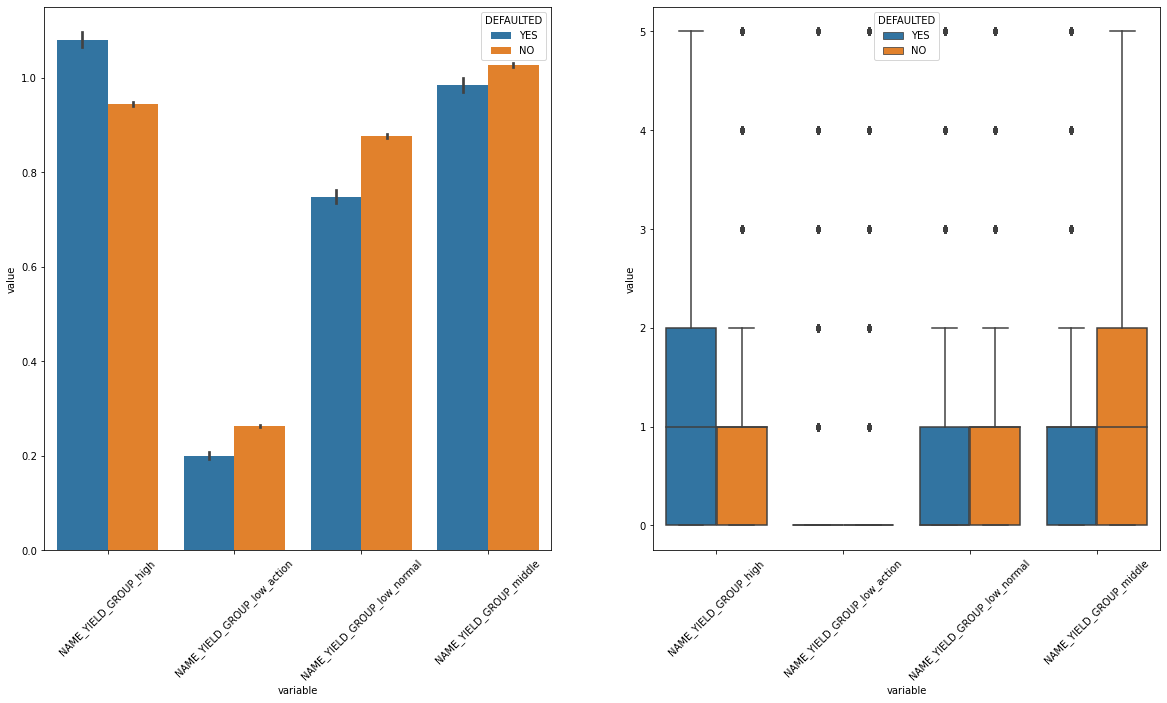

In [74]:
out = pd.get_dummies(merged_data,columns=['NAME_YIELD_GROUP'],prefix='NAME_YIELD_GROUP').groupby('SK_ID_CURR')['NAME_YIELD_GROUP_high','NAME_YIELD_GROUP_low_action','NAME_YIELD_GROUP_low_normal','NAME_YIELD_GROUP_middle','DEFAULTED'].sum()
out = pd.merge(out, application_data, on='SK_ID_CURR')[['NAME_YIELD_GROUP_high','NAME_YIELD_GROUP_low_action','NAME_YIELD_GROUP_low_normal','NAME_YIELD_GROUP_middle','DEFAULTED']]
out = out.melt(id_vars='DEFAULTED')
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.barplot(x='variable',y='value',hue='DEFAULTED',data=out[out.value<np.nanquantile(out.value,0.99)], ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.boxplot(x='variable',y='value',hue='DEFAULTED',data=out[out.value<np.nanquantile(out.value,0.99)], ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)

# Conclusions

1. Female Applicants are better than Male Applicants
2. Higher the education, lesser is the chance of being late on Payments
3. Caution must be bared when approving loans of Working Class
4. External Sources are key indicators of whether a person will default
5. IF an applicant has more previously approved loans, he has a lesser chance of being late on his current loans
6. Young adults and adults (15-40) tend to default more when compared to other age brackets
7. Any Income column (ANNUITY, CREDIT, INCOME) is not a key indicator for whether a applicant will default
8. If people had higher Rate of Interest on their previous loans their chance of being late on payments is higher